In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

        Date  BNB_Close  BNB_Volume    BTC_Close  BTC_Volume  DOGE_Close  \
0 2018-12-06   4.951687    38404207  3521.101807  5878333109    0.002097   
1 2018-12-07   4.528650    24895395  3419.937256  6835615448    0.002104   
2 2018-12-08   4.700418    16534323  3476.114746  5305024497    0.002120   
3 2018-12-09   4.859104    17862646  3614.234375  4947372847    0.002102   
4 2018-12-10   4.712263    13851408  3502.656006  5020968740    0.002100   

   DOGE_Volume  ETH_Close  ETH_Volume  XLM_Close  XLM_Volume  XRP_Close  \
0     24766152  91.761055  2310716932   0.119594   152806952   0.310936   
1     27761895  93.294563  2554304530   0.115263   174082644   0.301997   
2     18741868  92.159637  1855759401   0.118993   157281952   0.307269   
3     16961970  95.142059  1875567180   0.124328   184624488   0.313370   
4     15898038  91.685654  1756437577   0.118253    92973561   0.303766   

   XRP_Volume  
0   517551018  
1   667331347  
2   463529471  
3   430122747  
4   38662771

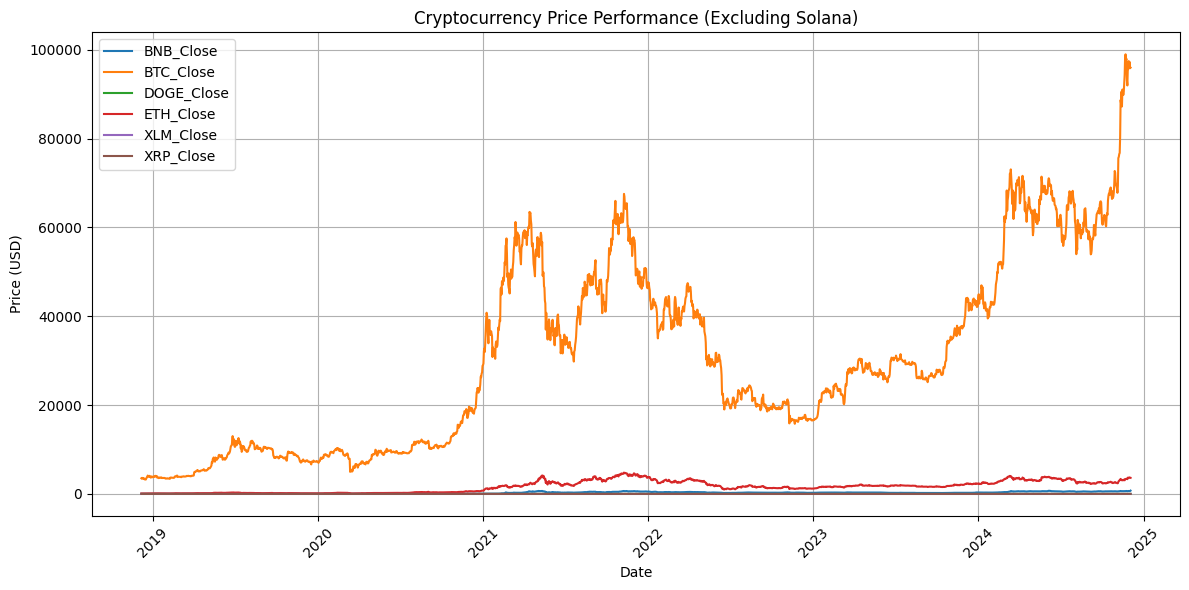

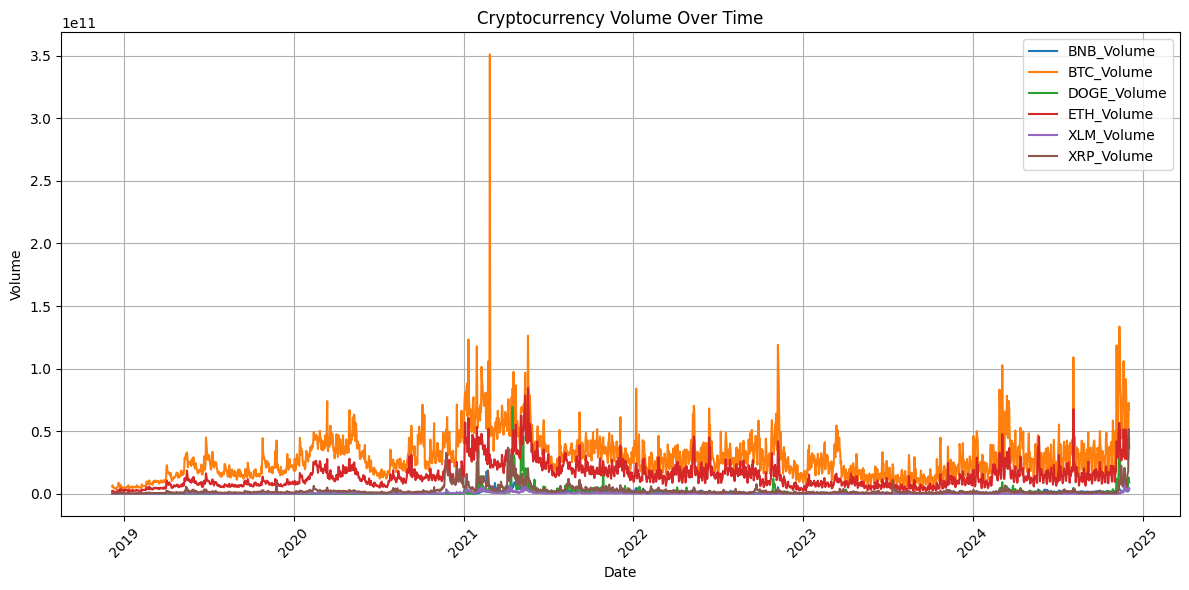

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (adjust paths as needed for your files)
bnb_data = pd.read_csv('/kaggle/input/dataset/cleaned_BNB-USD.csv')
btc_data = pd.read_csv('/kaggle/input/dataset/cleaned_BTC-USD.csv')
doge_data = pd.read_csv('/kaggle/input/dataset/cleaned_DOGE-USD.csv')
eth_data = pd.read_csv('/kaggle/input/dataset/cleaned_ETH-USD.csv')
xlm_data = pd.read_csv('/kaggle/input/dataset/cleaned_XLM-USD (2).csv')
xrp_data = pd.read_csv('/kaggle/input/dataset/cleaned_XRP-USD.csv')

# Convert the 'Date' columns to datetime format for all datasets
bnb_data['Date'] = pd.to_datetime(bnb_data['Date'])
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
doge_data['Date'] = pd.to_datetime(doge_data['Date'])
eth_data['Date'] = pd.to_datetime(eth_data['Date'])
xlm_data['Date'] = pd.to_datetime(xlm_data['Date'])
xrp_data['Date'] = pd.to_datetime(xrp_data['Date'])

# Merge all dataframes on 'Date' (ignoring Solana)
merged_data = pd.merge(bnb_data[['Date', 'Close', 'Volume']], btc_data[['Date', 'Close', 'Volume']], on='Date', suffixes=('_BNB', '_BTC'))
merged_data = pd.merge(merged_data, doge_data[['Date', 'Close', 'Volume']], on='Date', suffixes=('', '_DOGE'))
merged_data = pd.merge(merged_data, eth_data[['Date', 'Close', 'Volume']], on='Date', suffixes=('', '_ETH'))
merged_data = pd.merge(merged_data, xlm_data[['Date', 'Close', 'Volume']], on='Date', suffixes=('', '_XLM'))
merged_data = pd.merge(merged_data, xrp_data[['Date', 'Close', 'Volume']], on='Date', suffixes=('', '_XRP'))

# Rename columns for clarity
merged_data.rename(columns={
    'Close_BNB': 'BNB_Close',
    'Close_BTC': 'BTC_Close',
    'Close': 'DOGE_Close',
    'Close_ETH': 'ETH_Close',
    'Close_XLM': 'XLM_Close',
    'Close_XRP': 'XRP_Close',
    'Volume_BNB': 'BNB_Volume',
    'Volume_BTC': 'BTC_Volume',
    'Volume': 'DOGE_Volume',
    'Volume_ETH': 'ETH_Volume',
    'Volume_XLM': 'XLM_Volume',
    'Volume_XRP': 'XRP_Volume'
}, inplace=True)

# Check the first few rows to verify the data
print(merged_data.head())

# Ensure the data is starting from the earliest available date
print("Date Range in Data: ", merged_data['Date'].min(), " to ", merged_data['Date'].max())

# Plot cryptocurrency price performance (Excluding Solana)
plt.figure(figsize=(12, 6))

for col in ['BNB_Close', 'BTC_Close', 'DOGE_Close', 'ETH_Close', 'XLM_Close', 'XRP_Close']:
    plt.plot(merged_data['Date'], merged_data[col], label=col)

plt.title('Cryptocurrency Price Performance (Excluding Solana)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot cryptocurrency volume over time
plt.figure(figsize=(12, 6))

for col in ['BNB_Volume', 'BTC_Volume', 'DOGE_Volume', 'ETH_Volume', 'XLM_Volume', 'XRP_Volume']:
    plt.plot(merged_data['Date'], merged_data[col], label=col)

plt.title('Cryptocurrency Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


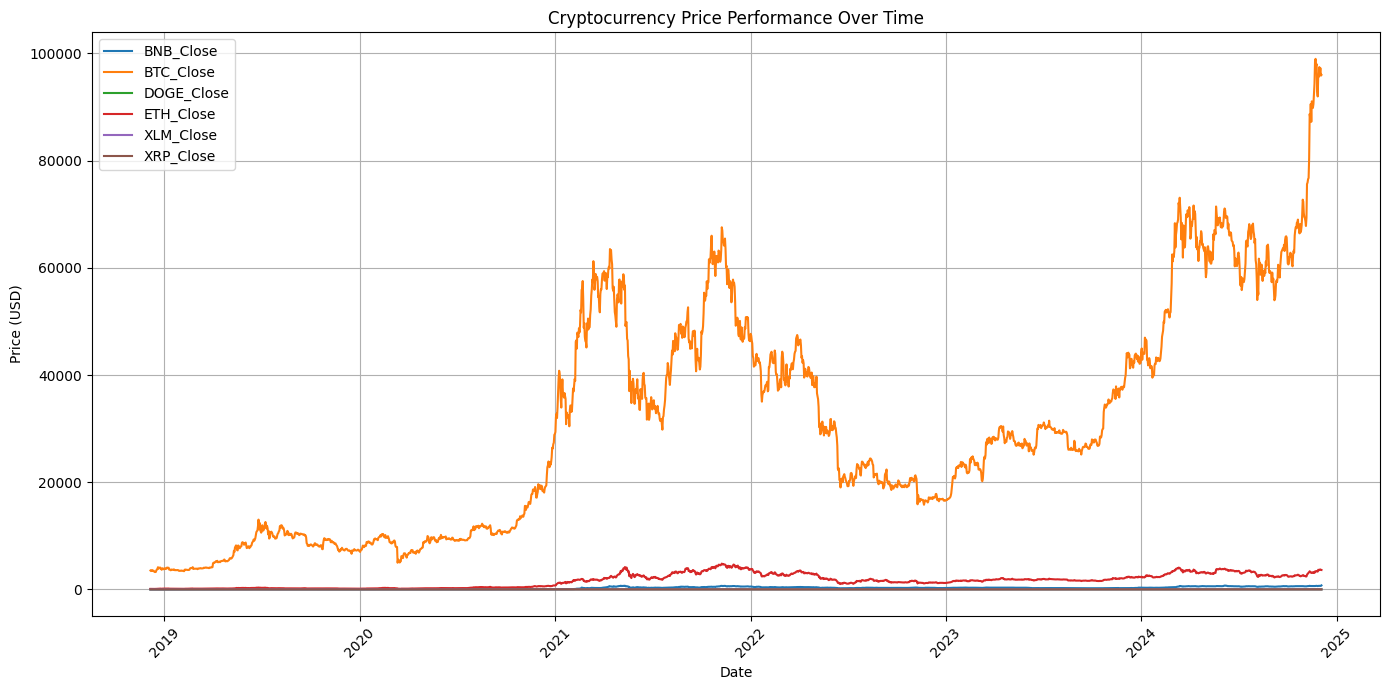

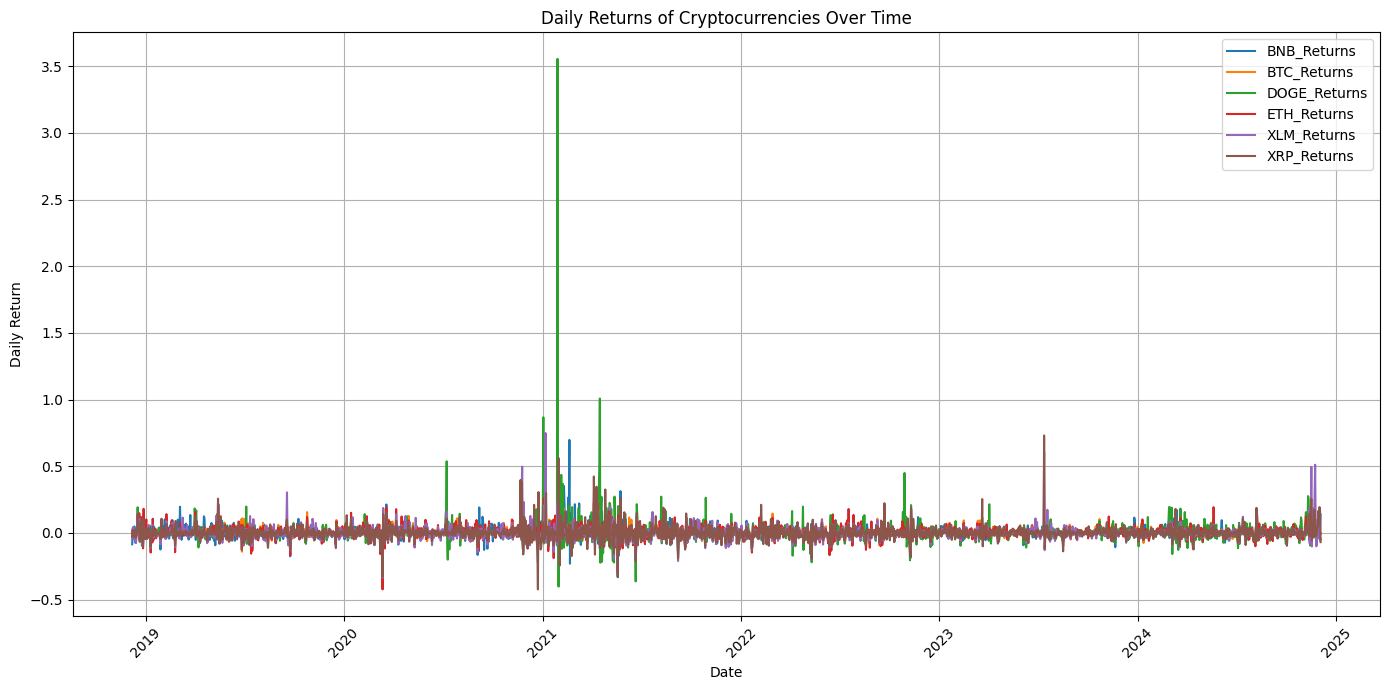

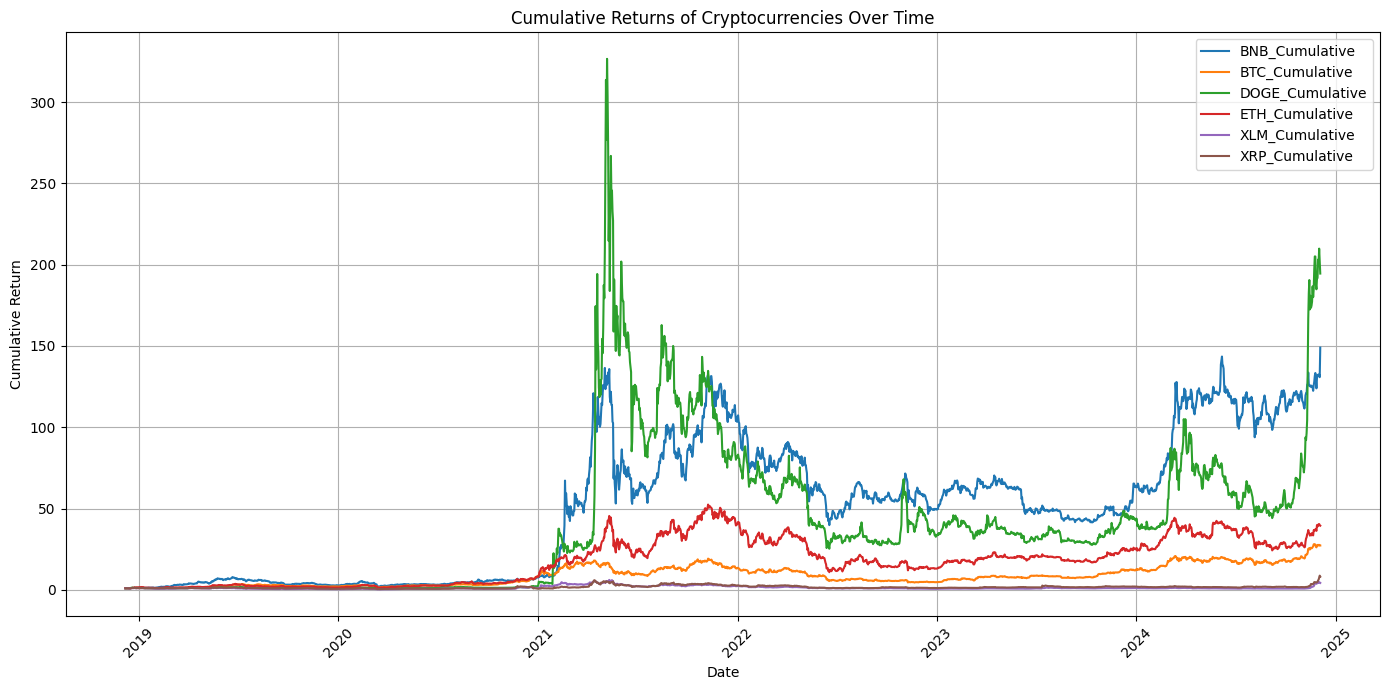

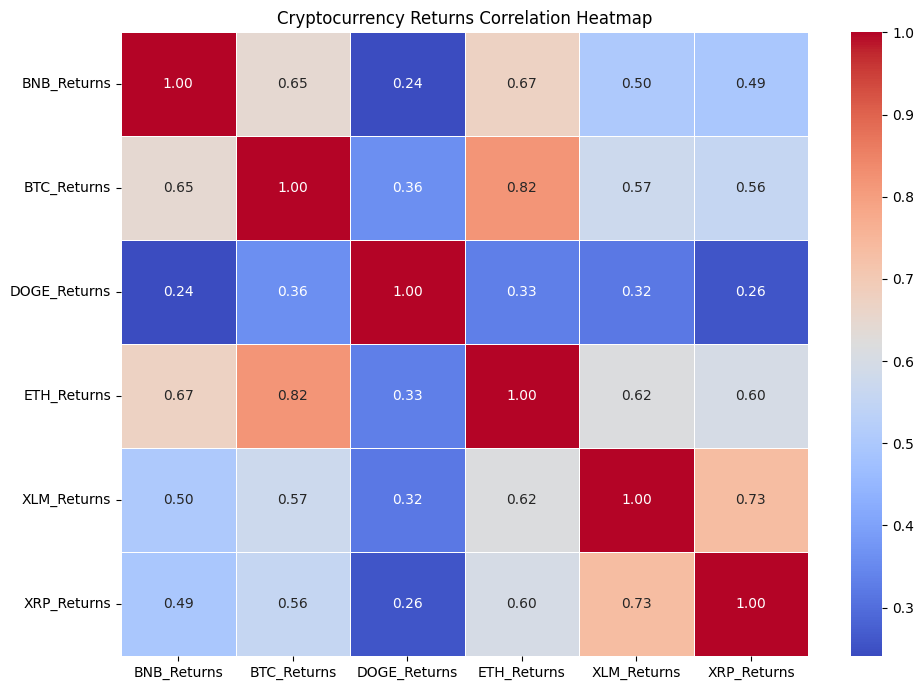

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is already loaded and cleaned
# Make sure to calculate the daily returns and cumulative returns

# Calculate daily returns for each cryptocurrency (percentage change)
merged_data['BNB_Returns'] = merged_data['BNB_Close'].pct_change()
merged_data['BTC_Returns'] = merged_data['BTC_Close'].pct_change()
merged_data['DOGE_Returns'] = merged_data['DOGE_Close'].pct_change()
merged_data['ETH_Returns'] = merged_data['ETH_Close'].pct_change()
merged_data['XLM_Returns'] = merged_data['XLM_Close'].pct_change()
merged_data['XRP_Returns'] = merged_data['XRP_Close'].pct_change()

# Calculate cumulative returns
merged_data['BNB_Cumulative'] = (1 + merged_data['BNB_Returns']).cumprod()
merged_data['BTC_Cumulative'] = (1 + merged_data['BTC_Returns']).cumprod()
merged_data['DOGE_Cumulative'] = (1 + merged_data['DOGE_Returns']).cumprod()
merged_data['ETH_Cumulative'] = (1 + merged_data['ETH_Returns']).cumprod()
merged_data['XLM_Cumulative'] = (1 + merged_data['XLM_Returns']).cumprod()
merged_data['XRP_Cumulative'] = (1 + merged_data['XRP_Returns']).cumprod()

# Plot 1: Price Performance Over Time
plt.figure(figsize=(14, 7))
for col in ['BNB_Close', 'BTC_Close', 'DOGE_Close', 'ETH_Close', 'XLM_Close', 'XRP_Close']:
    plt.plot(merged_data['Date'], merged_data[col], label=col)
plt.title('Cryptocurrency Price Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Daily Returns Over Time
plt.figure(figsize=(14, 7))
for col in ['BNB_Returns', 'BTC_Returns', 'DOGE_Returns', 'ETH_Returns', 'XLM_Returns', 'XRP_Returns']:
    plt.plot(merged_data['Date'], merged_data[col], label=col)
plt.title('Daily Returns of Cryptocurrencies Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Cumulative Returns Over Time
plt.figure(figsize=(14, 7))
for col in ['BNB_Cumulative', 'BTC_Cumulative', 'DOGE_Cumulative', 'ETH_Cumulative', 'XLM_Cumulative', 'XRP_Cumulative']:
    plt.plot(merged_data['Date'], merged_data[col], label=col)
plt.title('Cumulative Returns of Cryptocurrencies Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 4: Correlation Heatmap
# Calculate correlation matrix for the daily returns
corr_matrix = merged_data[['BNB_Returns', 'BTC_Returns', 'DOGE_Returns', 'ETH_Returns', 'XLM_Returns', 'XRP_Returns']].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Cryptocurrency Returns Correlation Heatmap')
plt.tight_layout()
plt.show()


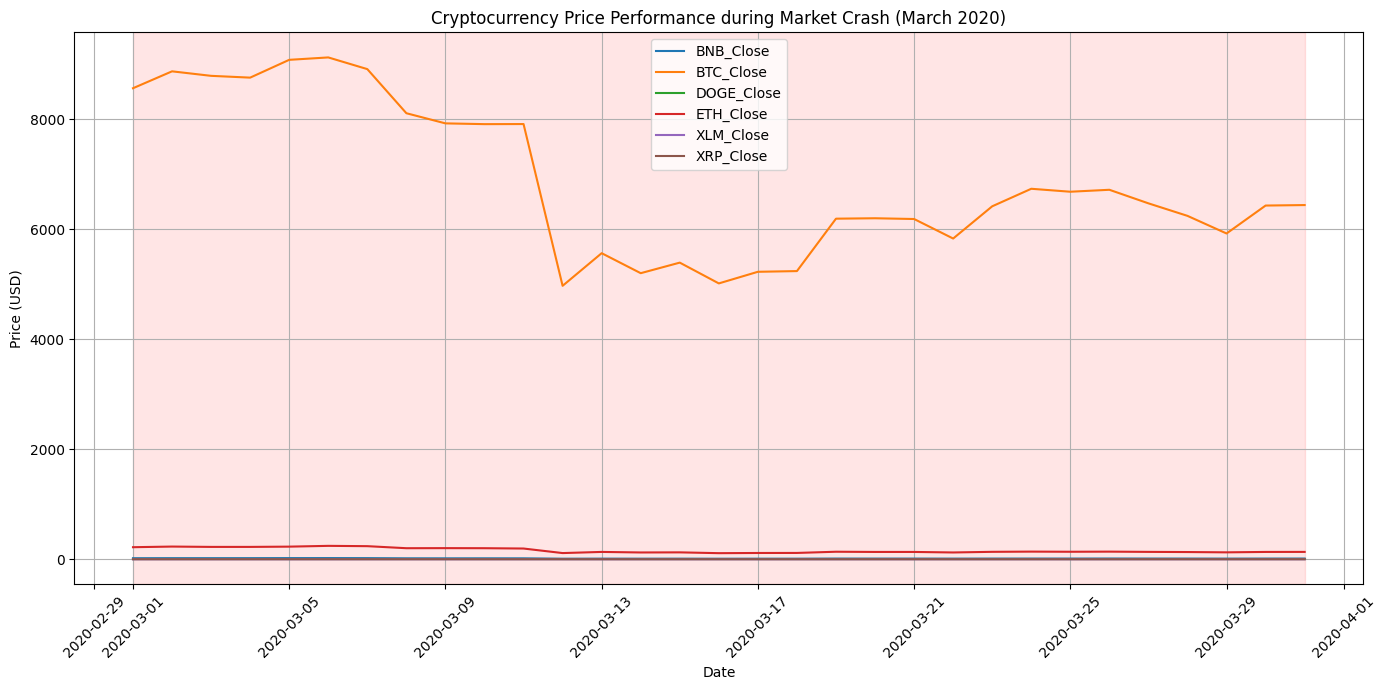

In [3]:
# Filter the data for the crash period (March 2020)
crash_period = merged_data[(merged_data['Date'] >= '2020-03-01') & (merged_data['Date'] <= '2020-03-31')]

# Plot cryptocurrency performance during the crash period (March 2020)
plt.figure(figsize=(14, 7))

# Plot each cryptocurrency
for col in ['BNB_Close', 'BTC_Close', 'DOGE_Close', 'ETH_Close', 'XLM_Close', 'XRP_Close']:
    plt.plot(crash_period['Date'], crash_period[col], label=col)

# Highlight the crash period with a shaded region (March 2020)
plt.axvspan(crash_period['Date'].min(), crash_period['Date'].max(), color='red', alpha=0.1)

plt.title('Cryptocurrency Price Performance during Market Crash (March 2020)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


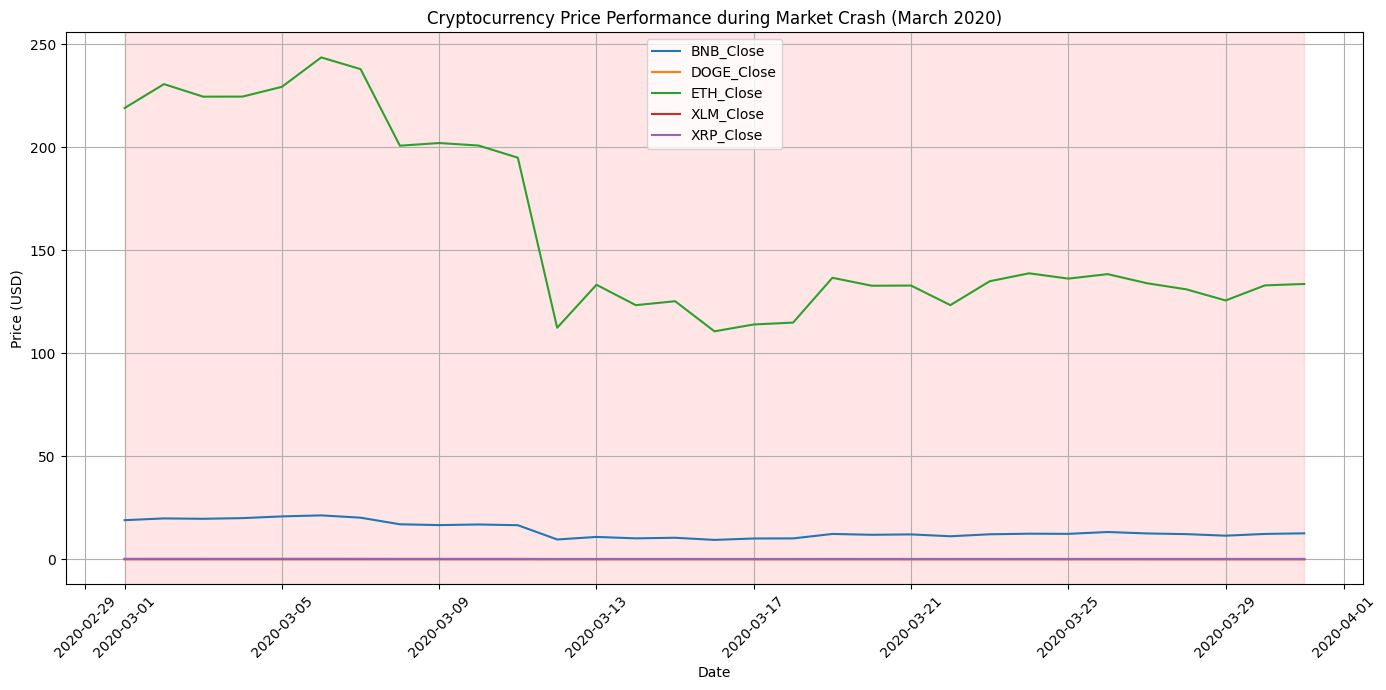

In [4]:
# Filter the data for the crash period (March 2020)
crash_period = merged_data[(merged_data['Date'] >= '2020-03-01') & (merged_data['Date'] <= '2020-03-31')]

# Plot cryptocurrency performance during the crash period (March 2020)
plt.figure(figsize=(14, 7))

# Plot each cryptocurrency
for col in ['BNB_Close', 'DOGE_Close', 'ETH_Close', 'XLM_Close', 'XRP_Close']:
    plt.plot(crash_period['Date'], crash_period[col], label=col)

# Highlight the crash period with a shaded region (March 2020)
plt.axvspan(crash_period['Date'].min(), crash_period['Date'].max(), color='red', alpha=0.1)

plt.title('Cryptocurrency Price Performance during Market Crash (March 2020)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


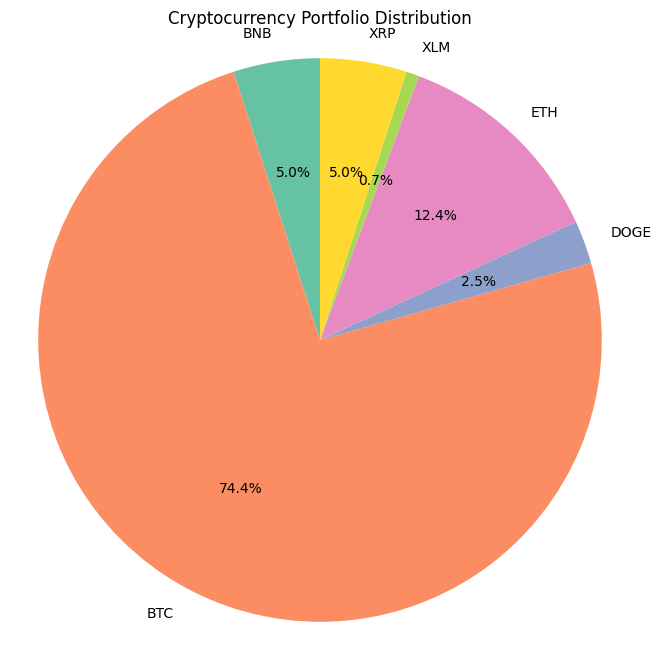

In [5]:
# Assuming you have a portfolio with specific holdings, you can create a pie chart
# Example portfolio allocation (you can replace these values with your actual holdings)
portfolio_values = {
    'BNB': 1000,  # Example amount in USD
    'BTC': 15000, 
    'DOGE': 500, 
    'ETH': 2500,
    'XLM': 150, 
    'XRP': 1000
}

# Total portfolio value
total_value = sum(portfolio_values.values())

# Pie chart showing portfolio distribution
plt.figure(figsize=(8, 8))
plt.pie(portfolio_values.values(), labels=portfolio_values.keys(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(portfolio_values)))
plt.title('Cryptocurrency Portfolio Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()


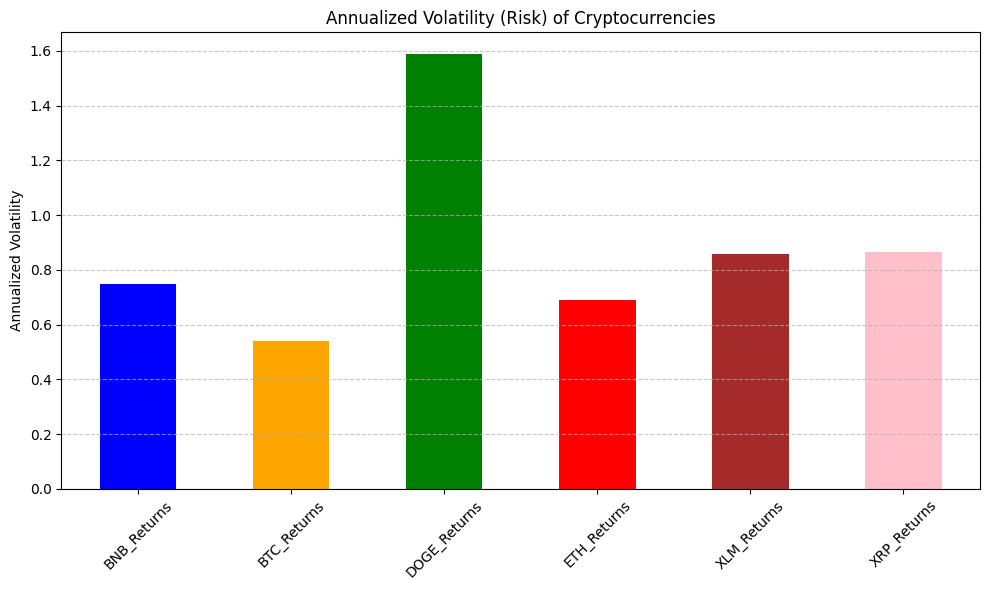

In [6]:
# Calculate the annualized standard deviation (volatility) of daily returns
volatility = merged_data[['BNB_Returns', 'BTC_Returns', 'DOGE_Returns', 'ETH_Returns', 'XLM_Returns', 'XRP_Returns']].std() * (252**0.5)

# Plot the volatility for each cryptocurrency
plt.figure(figsize=(10, 6))
volatility.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'brown', 'pink'])
plt.title('Annualized Volatility (Risk) of Cryptocurrencies')
plt.ylabel('Annualized Volatility')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

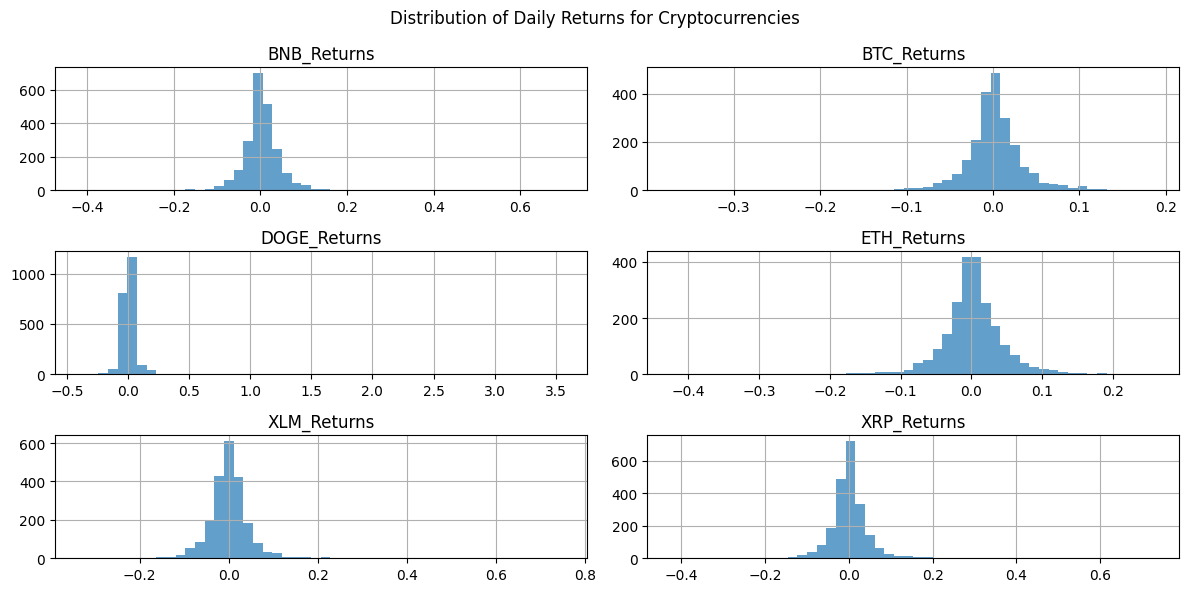

In [7]:
# Plot histograms of daily returns for each cryptocurrency
plt.figure(figsize=(12, 6))

merged_data[['BNB_Returns', 'BTC_Returns', 'DOGE_Returns', 'ETH_Returns', 'XLM_Returns', 'XRP_Returns']].hist(bins=50, alpha=0.7, figsize=(12, 6))

plt.suptitle('Distribution of Daily Returns for Cryptocurrencies')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

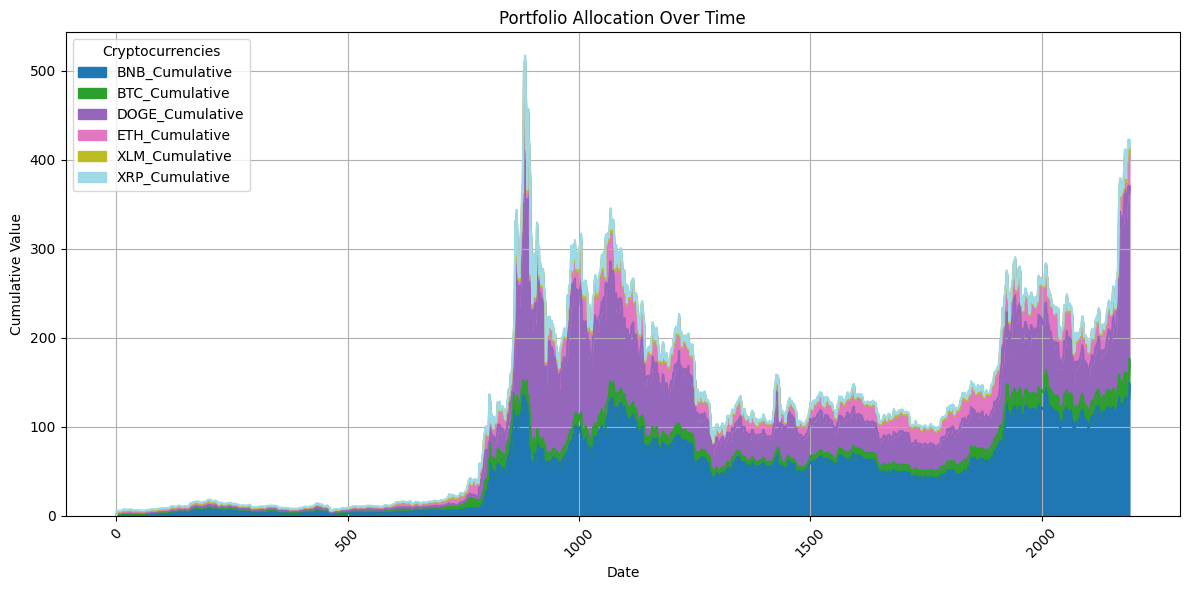

In [8]:
# Assuming you have a portfolio of different cryptocurrencies
portfolio_values = merged_data[['BNB_Cumulative', 'BTC_Cumulative', 'DOGE_Cumulative', 'ETH_Cumulative', 'XLM_Cumulative', 'XRP_Cumulative']]

# Plot the stacked area plot
plt.figure(figsize=(12, 6))
portfolio_values.plot.area(stacked=True, figsize=(12, 6), cmap="tab20")
plt.title('Portfolio Allocation Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.legend(title='Cryptocurrencies')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


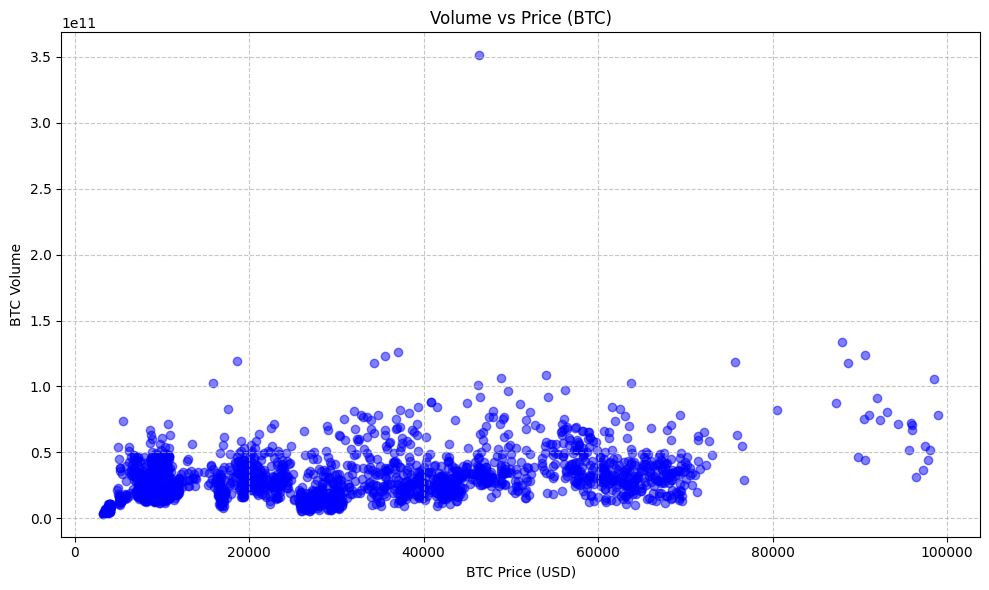

In [9]:
# Plot Volume vs Price for Bitcoin (example)
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['BTC_Close'], merged_data['BTC_Volume'], alpha=0.5, color='blue')
plt.title('Volume vs Price (BTC)')
plt.xlabel('BTC Price (USD)')
plt.ylabel('BTC Volume')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


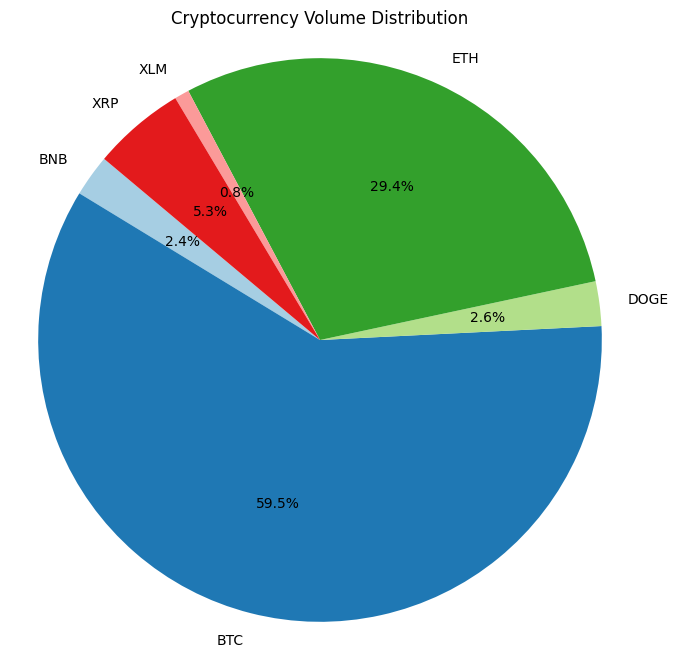

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already loaded and merged the data as shown before
# merged_data contains the volume columns like 'BNB_Volume', 'BTC_Volume', etc.

# Sum the volume for each cryptocurrency over the entire dataset
volume_sum = {
    'BNB': merged_data['BNB_Volume'].sum(),
    'BTC': merged_data['BTC_Volume'].sum(),
    'DOGE': merged_data['DOGE_Volume'].sum(),
    'ETH': merged_data['ETH_Volume'].sum(),
    'XLM': merged_data['XLM_Volume'].sum(),
    'XRP': merged_data['XRP_Volume'].sum(),
}

# Convert the dictionary to a pandas Series for easy plotting
volume_series = pd.Series(volume_sum)

# Create a pie chart showing the distribution of volumes
plt.figure(figsize=(8, 8))
plt.pie(volume_series, labels=volume_series.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Cryptocurrency Volume Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


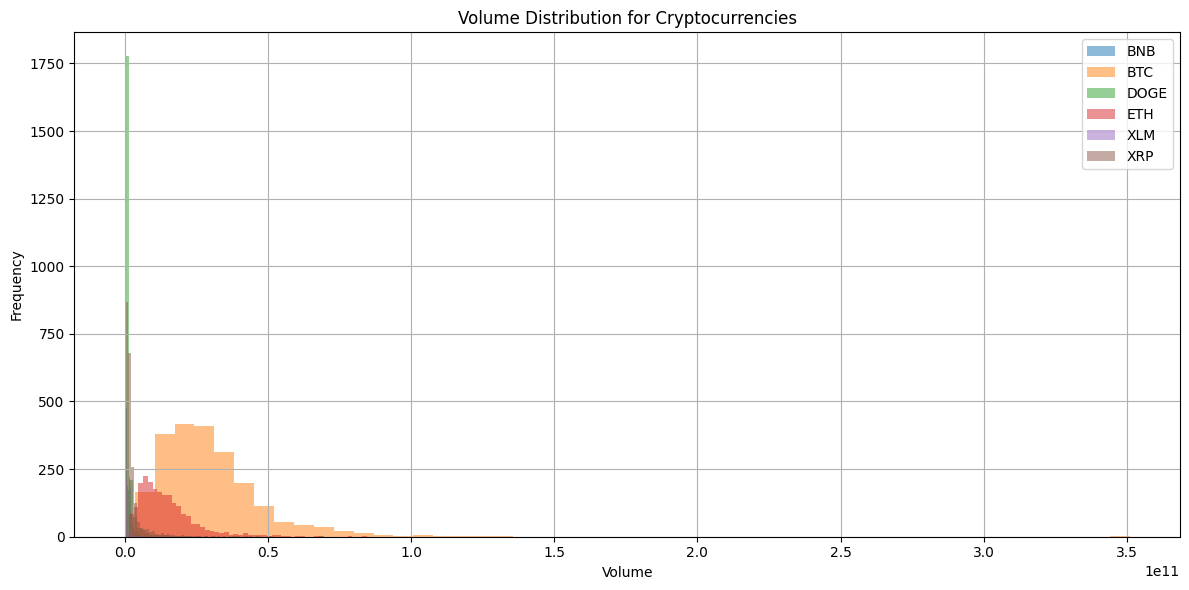

In [11]:
# Plot: Volume Distribution Histogram for each cryptocurrency
plt.figure(figsize=(12, 6))

# Plot histograms for each cryptocurrency volume distribution
for col in ['BNB', 'BTC', 'DOGE', 'ETH', 'XLM', 'XRP']:
    plt.hist(merged_data[f'{col}_Volume'], bins=50, alpha=0.5, label=col)

plt.title('Volume Distribution for Cryptocurrencies')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


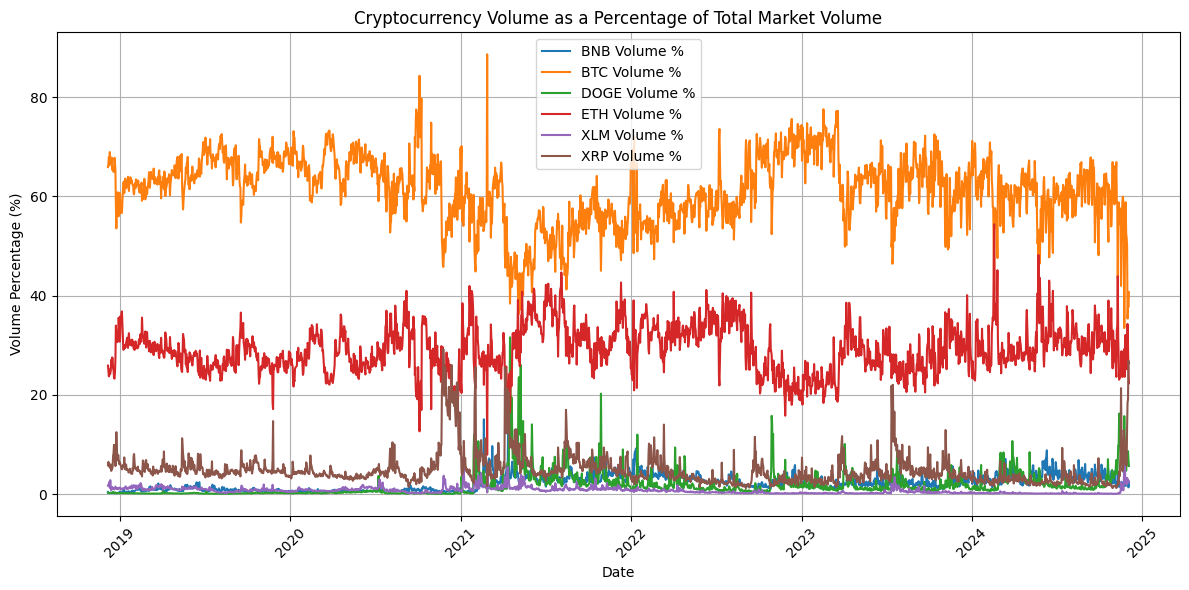

In [12]:
# Calculate the total market volume for each day
merged_data['Total_Volume'] = merged_data[['BNB_Volume', 'BTC_Volume', 'DOGE_Volume', 'ETH_Volume', 'XLM_Volume', 'XRP_Volume']].sum(axis=1)

# Calculate the percentage volume for each cryptocurrency
for col in ['BNB', 'BTC', 'DOGE', 'ETH', 'XLM', 'XRP']:
    merged_data[f'{col}_Volume_Percent'] = (merged_data[f'{col}_Volume'] / merged_data['Total_Volume']) * 100

# Plot the percentage of total volume for each cryptocurrency
plt.figure(figsize=(12, 6))

for col in ['BNB', 'BTC', 'DOGE', 'ETH', 'XLM', 'XRP']:
    plt.plot(merged_data['Date'], merged_data[f'{col}_Volume_Percent'], label=f'{col} Volume %')

plt.title('Cryptocurrency Volume as a Percentage of Total Market Volume')
plt.xlabel('Date')
plt.ylabel('Volume Percentage (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


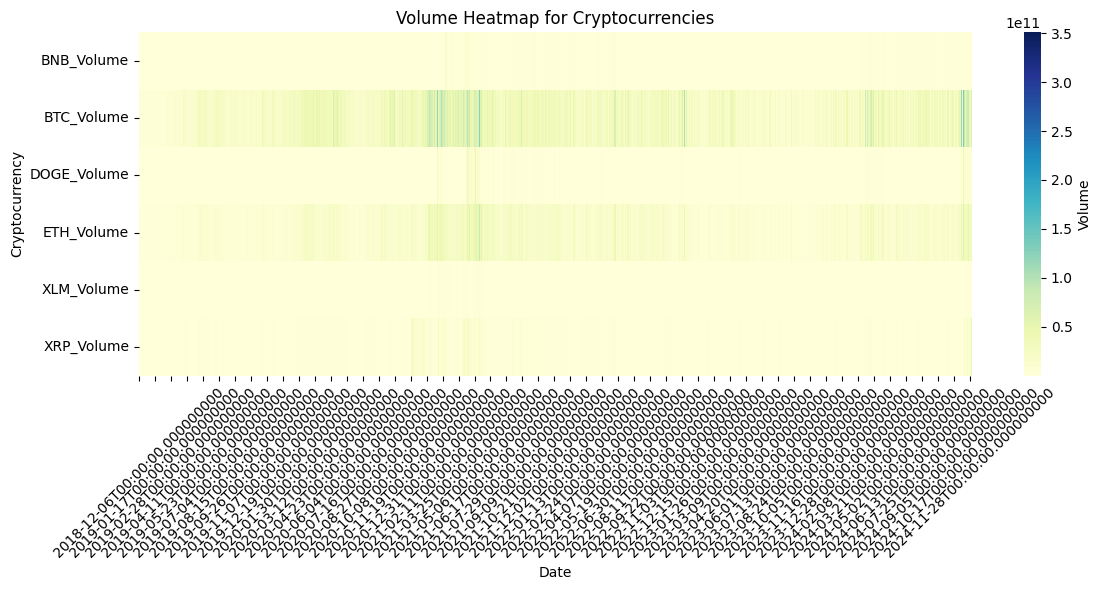

In [13]:
import seaborn as sns

# Reshape the data for a heatmap: Date on x-axis, cryptocurrencies on y-axis, and volume as the values
heatmap_data = merged_data[['Date', 'BNB_Volume', 'BTC_Volume', 'DOGE_Volume', 'ETH_Volume', 'XLM_Volume', 'XRP_Volume']]
heatmap_data.set_index('Date', inplace=True)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar_kws={'label': 'Volume'}, annot=False)
plt.title('Volume Heatmap for Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Cryptocurrency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
